In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [3]:
series_obj = Series(np.arange(8), index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6', 'row 7', 'row 8'])
series_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int64

In [4]:
# When you write square brackets with a label-index inside them, this tells Python to select and retrieve all records with that label-index
series_obj['row 7']

6

In [7]:
# When you write square brackets with an integer index inside them, this tells Python to select and retrieve records with the specific integer index
series_obj[[0,7]]

row 1    0
row 8    7
dtype: int64

In [8]:
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape((6,6)), index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'],
                   columns=['column 1', 'column 2', 'column 3', 'column 4', 'column 5', 'column 6'])
DF_obj

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [13]:
# When you call the .ix[] special indexer, and pass in a set of row and column indexes, this tells Python to select and retrieve only those specific rows and columns
DF_obj.ix[['row 2', 'row 5'],['column 5', 'column 2']]

,column 5,column 2
row 2,0.402366,0.437611
row 5,0.421004,0.559053


In [14]:
# Data slicing allows you to select and retrieve all records from the starting label-index, to the ending label-index, and every record in between
series_obj['row 3':'row 7']

row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
dtype: int64

In [15]:
# You can use comparison operators (like <, >) to return T/F values for all records, to indicate ho each element compares to a scalar value
DF_obj < .2

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,False,False,False,True,False,True
row 2,False,False,False,False,False,True
row 3,False,False,True,False,False,False
row 4,False,False,False,False,False,False
row 5,False,False,True,False,False,False
row 6,False,False,False,False,False,False


In [16]:
# You can use comparison operators and scalar values for indexing, to return only the records that staisfy the comparison expression you write
series_obj[series_obj > 6]

row 8    7
dtype: int64

In [17]:
# Setting is where you select all records associated with the specified label-indexes and set those values equal to a scalar
series_obj['row 1', 'row 5', 'row 8'] = 8

In [18]:
series_obj

row 1    8
row 2    1
row 3    2
row 4    3
row 5    8
row 6    5
row 7    6
row 8    8
dtype: int64

In [20]:
# Figuring out what data is missing
missing = np.nan
series_obj = Series(['row 1', 'row 2', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
series_obj

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [21]:
# The .isnull() method returns a Boolean value that describes (T/f) whether an element in a pandas object is a null value
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [23]:
np.random.seed(25)
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477


In [25]:
DF_obj.ix[3:5, 0] = missing
DF_obj.ix[1:4, 5] = missing
DF_obj

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,NaN
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,NaN
3,NaN,-0.419678,2.294842,-2.594487,2.822756,NaN
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,NaN
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


In [26]:
# The .fillna method() finds each missing value from within a pandas object and fills it with the numeric value that you've passed in
filled_DF = DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,0.000000
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,0.000000
3,0.000000,-0.419678,2.294842,-2.594487,2.822756,0.000000
4,0.000000,-1.976254,0.533340,-0.290870,-0.513520,0.000000
5,0.000000,-1.839905,1.607671,0.388292,0.399732,0.405477


In [27]:
# You can pass a dictionary into the .fillna() method. the method will then fill in the missing values
# from each column Series (as designated by the dictionary key) with its own uniqu evalue
# (as specified in the corresponding dictionary value)
filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,1.250000
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,1.250000
3,0.100000,-0.419678,2.294842,-2.594487,2.822756,1.250000
4,0.100000,-1.976254,0.533340,-0.290870,-0.513520,1.250000
5,0.100000,-1.839905,1.607671,0.388292,0.399732,0.405477


In [28]:
# You can also pass in the method = 'ffill' argument, and the .fillna() method will fill-forward any
# missing values with values from the last non-null element in the column series
fill_DF = DF_obj.fillna(method='ffill')
fill_DF

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.222326
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-0.222326
3,2.152957,-0.419678,2.294842,-2.594487,2.822756,-0.222326
4,2.152957,-1.976254,0.533340,-0.290870,-0.513520,-0.222326
5,2.152957,-1.839905,1.607671,0.388292,0.399732,0.405477


In [161]:
# Counting missing values
np.random.seed(25)
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj.ix[3:5, 0] = missing
DF_obj.ix[1:4, 5] = missing
DF_obj

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,NaN
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,NaN
3,NaN,-0.419678,2.294842,-2.594487,2.822756,NaN
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,NaN
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


In [31]:
# To generate a count of how many missing values a DataFrame has per column, just call the isnull()
# metod off of the object, and then call the .sum() method off of the matrix of Boolean values it returns
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

In [33]:
# Filtering out missing values
# To identify and drop all rows from a DataFrame that contain ANY missing values, simply call the 
# .dropna() method off of the DataFrame object. NOTE: If you wanted to drop columns that contain
# any missing values, you'd just pass in the axis = 1 argument to select and search the DataFrame
# by columns, instead of by row.
DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

,1,2,3,4
0,1.026890,-0.839585,-0.591182,-0.956888
1,1.837905,-2.053231,0.868583,-0.920734
2,-1.334661,0.076380,-1.246089,1.202272
3,-0.419678,2.294842,-2.594487,2.822756
4,-1.976254,0.533340,-0.290870,-0.513520
5,-1.839905,1.607671,0.388292,0.399732


In [34]:
# To identify and drop only the rows from a DataFrame that contain ALL missing values, simply 
# call the .dropna() method off of the DataFrame object, and pass in the how = 'all' argument.
DF_obj.dropna(how='all')

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,NaN
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,NaN
3,NaN,-0.419678,2.294842,-2.594487,2.822756,NaN
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,NaN
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


In [38]:
# Removing duplicates
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [39]:
DF_obj = DataFrame({'column 1':[1,1,2,2,3,3,3],
                   'column 2':['a','a','b','b','c','c','c'],
                   'column 3':['A','A','B','B','C','C','C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [40]:
# The .duplicated() method searches each row in the DataFrame, and returns a T/F value to
# indicate whether it is a duplicate of another row found earlier in the DataFrame
DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [41]:
# To drop all duplicate rows, just call the drop_duplicates() method off of the DataFrame
DF_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [42]:
DF_obj = DataFrame({'column 1':[1,1,2,2,3,3,3],
                   'column 2':['a','a','b','b','c','c','c'],
                   'column 3':['A','A','B','B','C','D','C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [43]:
# To drop the rows that have duplicates in only one column Series, just call the drop_duplicates()
# method off of the DataFrame, and pass in the label-index of the column you want the de-duplication
# to be based on. This method will drop all rows that have duplicates in the column you specify.
DF_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


In [44]:
# Concatenating and transforming data
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [45]:
DF_obj = pd.DataFrame(np.arange(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [46]:
DF_obj_2 = pd.DataFrame(np.arange(15).reshape(5,3))
DF_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [51]:
# The concat() method joins data from seperate sources into one combined data table. If you want to
# join objects based on their row index values, just call the pd.concat() method on the objects you
# Want joined, and then pass in the axis=1 argument. The axis=1 argument tells Python to concatenate
# the DataFrames by adding columns (in other words, joining on the row index values).
pd.concat([DF_obj, DF_obj_2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [52]:
pd.concat([DF_obj, DF_obj_2])
# Because there was no axis=1 argument, it defaults to axis = 0 which combines tables on top of eachother

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


In [53]:
# You can easily drop rows from a DataFram by calling the .drop() method and passing in the index
# values for the rows you want dropped
DF_obj.drop([0,2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [55]:
# Or do the same thing but for columns by using the axis = 1 argument. The column numbers in brackets
# will be dropped
DF_obj.drop([0,2], axis = 1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


In [58]:
# Adding data
series_obj = Series(np.arange(6))
series_obj.name = "added_variable"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int64

In [60]:
# You can use .join() method to join two data sources into one. The .join() method works by joining
# the two sources on their row index values.
variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [61]:
# To tack on data to the end of a datatable use this...
added_datatable = variable_added.append(variable_added, ignore_index=False)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [62]:
# To make a continued number of row number labels (instead of repeating like above)...
added_datatable = variable_added.append(variable_added, ignore_index=True)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


In [64]:
# Sorting data
# To sort row in a DataFrame, either in ascending or descending order, call the .sort_values()
# method off of the DataFrame, and pass in the by argument to specify the column index upon which
# the DataFrame should be sorted.
DF_sorted = DF_obj.sort_values(by=[5], ascending=[False])
DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


In [72]:
# Subgrouping your data
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [73]:
# To group a DataFrame by its values in a particular column, call the .groupby() method off of the DataFrame, and then pass
# in the calumn Series you want the DataFrame to be grouped by.
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [74]:
# Data visualization
! pip install Seaborn

You are using pip version 9.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [85]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [86]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

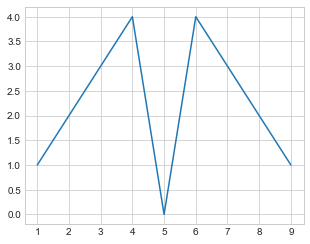

In [87]:
# Creating a line chart from a list object
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

In [88]:
# Plotting a line chart from a Pandas object
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch02/02_01/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
mpg = cars['mpg']

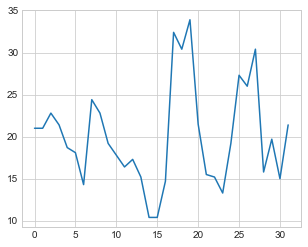

In [89]:
mpg.plot()

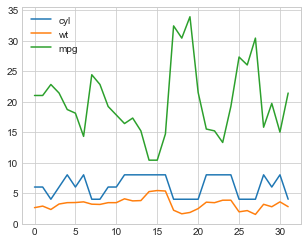

In [90]:
df = cars[['cyl','wt','mpg']]
df.plot()

<Container object of 9 artists>

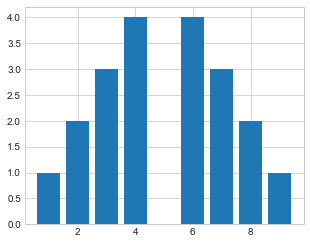

In [92]:
# Creating bar charts
plt.bar(x,y)

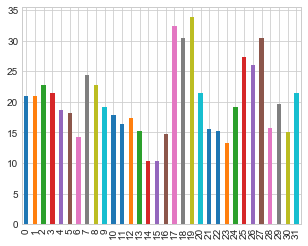

In [93]:
# Creating bar charts from Pandas objects
mpg.plot(kind='bar')

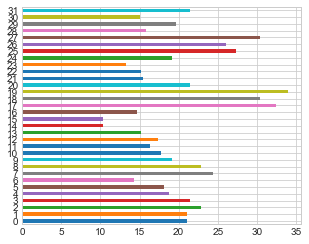

In [94]:
# For horizontal bar charts
mpg.plot(kind = 'barh')
# Note that single quotes and double quotes can be used interchangeably "" or ''

<function matplotlib.pyplot.show>

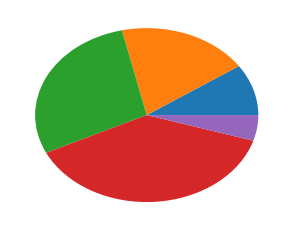

In [96]:
# Creating a pie chart
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show

In [97]:
# Saving a plot as an image file (jpg)
plt.savefig('pie_chart.jpeg')
plt.show()

In [98]:
# To figure out where you just saved that...
%pwd

u'/Users/sallgaier96/Desktop/Python Programming Course'

In [100]:
# Defining elements of a plot
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [101]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

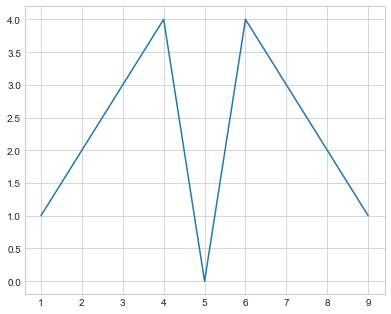

In [103]:
# Defining axes, ticks, and grids
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.plot(x,y)

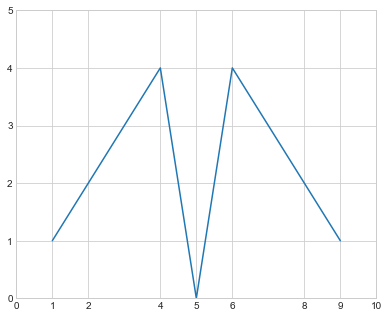

In [104]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

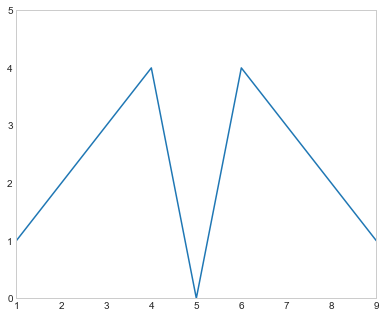

In [108]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

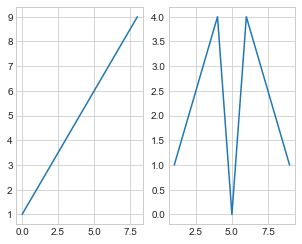

In [109]:
# Generating multiple plots in one figure with subplots
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)
# one row, two columns
ax1.plot(x)
ax2.plot(x,y)

In [110]:
# Plot formatting
import seaborn as sb

In [111]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

<Container object of 9 artists>

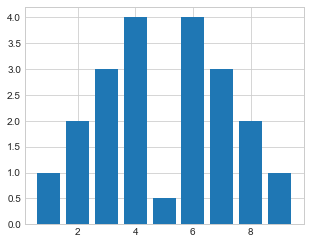

In [116]:
# Defining plot color
x = range(1,10)
y = [1,2,3,4,0.5,4,3,2,1]
plt.bar(x,y)

<Container object of 9 artists>

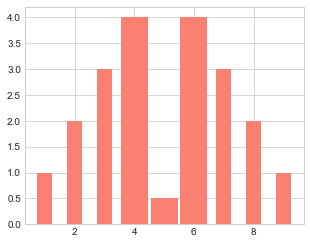

In [117]:
wide = [0.5, 0.5,0.5,0.9,0.9,0.9,0.5,0.5,0.5]
color = ['salmon']
plt.bar(x, y, width = wide, color = color, align = 'center')

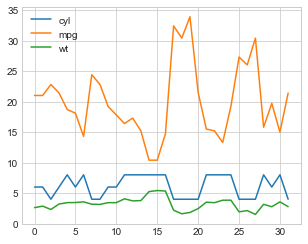

In [119]:
df = cars[['cyl','mpg','wt']]
df.plot()

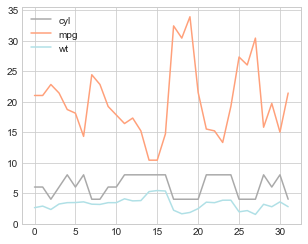

In [120]:
color_theme = ['darkgray','lightsalmon','powderblue']
df.plot(color = color_theme)

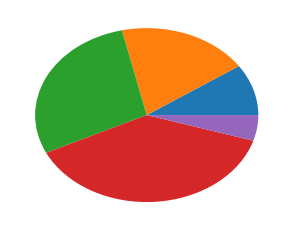

In [121]:
z = [1,2,3,4,0.5]
plt.pie(z)
plt.show()

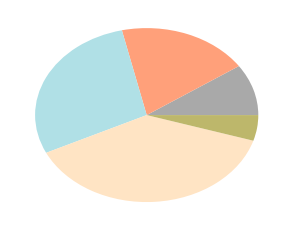

In [122]:
color_theme = ['#a9a9a9','#ffa07a','#b0e0e6','#ffe4c4','#bdb76b']
plt.pie(z, colors = color_theme)
plt.show()

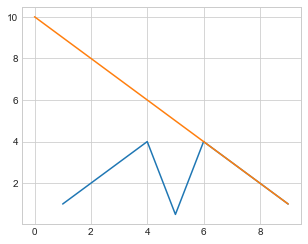

In [123]:
# Customizing line styles
x1 = range(0,10)
y1 = [10,9,8,7,6,5,4,3,2,1]

plt.plot(x,y)
plt.plot(x1,y1)

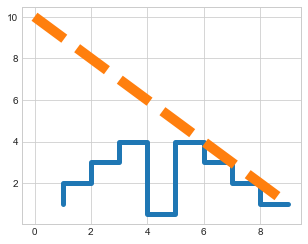

In [124]:
# Customizing line types
plt.plot(x,y, ls = 'steps', lw = 5)
plt.plot(x1,y1, ls = '--', lw = 10)

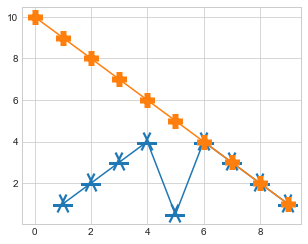

In [125]:
# Setting plot markers
plt.plot(x,y, marker = '1', mew = 20)
plt.plot(x1,y1, marker = '+', mew =15)

In [126]:
# Creating labels and annotations
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [127]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
sb.set_style('whitegrid')

Text(0,0.5,u'your y-axis label')

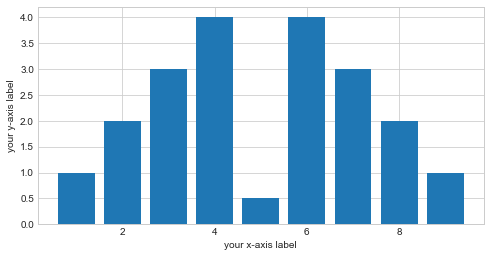

In [128]:
# Labeling plot features
# The functional method
x = range(1,10)
y = [1,2,3,4,0.5,4,3,2,1]
plt.bar(x,y)

plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

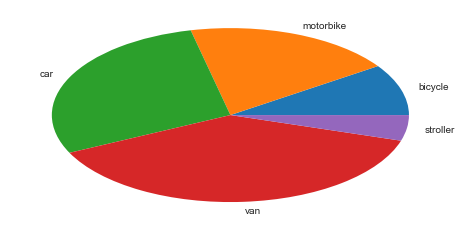

In [129]:
z = [1,2,3,4,0.5]
veh_type = ['bicycle', 'motorbike','car','van','stroller']
plt.pie(z, labels = veh_type)
plt.show()

Text(0,0.5,u'miles/gallon')

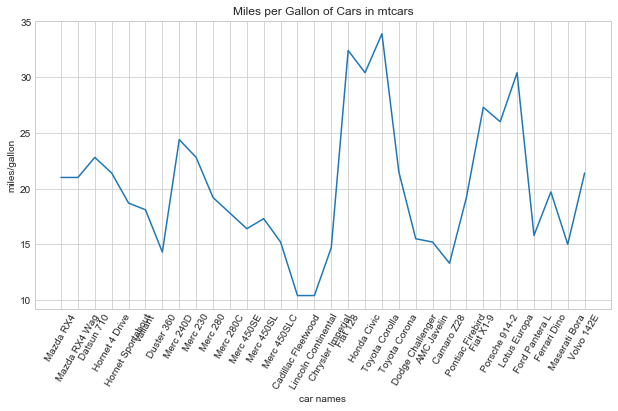

In [132]:
# The object oriented method
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch02/02_04/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

mpg = cars.mpg
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_xlabel('car names')
ax.set_ylabel('miles/gallon')

<function matplotlib.pyplot.show>

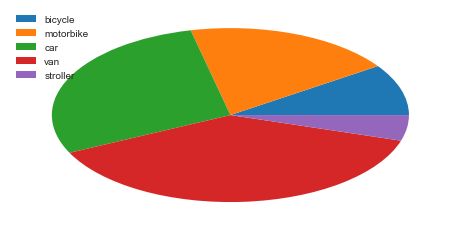

In [133]:
# Adding a legend to your plot
# The functional method
plt.pie(z)
plt.legend(veh_type, loc = 'best')
plt.show

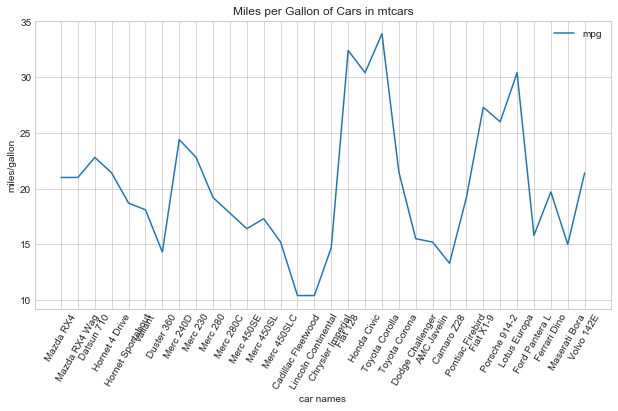

In [134]:
# The object-oriented method
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_xlabel('car names')
ax.set_ylabel('miles/gallon')

ax.legend(loc = 'best')

In [135]:
# Annotating your plot
mpg.max()

33.9

Text(21,35,u'Toyota Corolla')

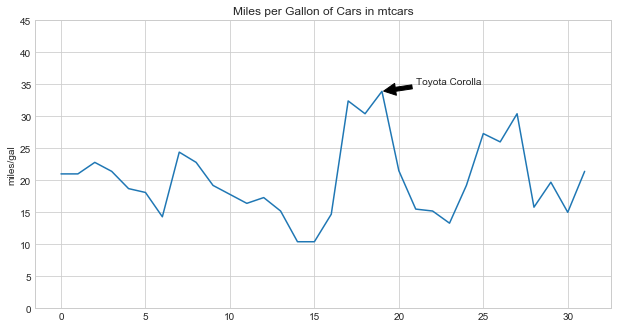

In [136]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
mpg.plot()
ax.set_title("Miles per Gallon of Cars in mtcars")
ax.set_ylabel('miles/gal')

ax.set_ylim([0,45])

ax.annotate('Toyota Corolla', xy=(19,33.9), xytext = (21,35),
           arrowprops = dict(facecolor = 'black', shrink = 0.05))

In [137]:
# Creating visualizations from time series data
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [141]:
# The simplest time series plot
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch02/02_05/Superstore-Sales.csv'
df = pd.read_csv(address, index_col = 'Order Date', parse_dates = True)
df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


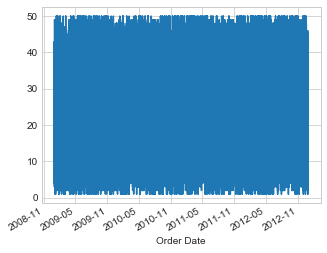

In [143]:
df['Order Quantity'].plot()

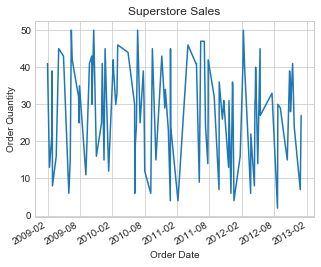

In [144]:
df2 = df.sample(n = 100, random_state = 25, axis = 0)

plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

In [145]:
# Constructing histograms, box plots, and scatter plots
from pandas.tools.plotting import scatter_matrix

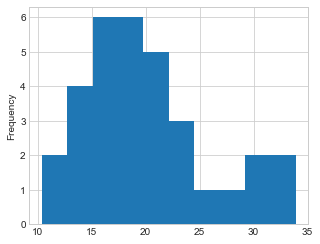

In [146]:
# Eyeballing dataset distributions with histograms
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch02/02_06/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.index = cars.car_names
mpg = cars['mpg']

mpg.plot(kind = 'hist')

[]

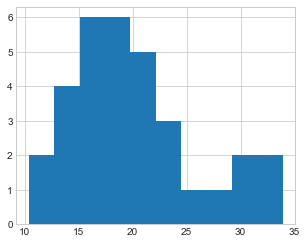

In [147]:
plt.hist(mpg)
plt.plot()

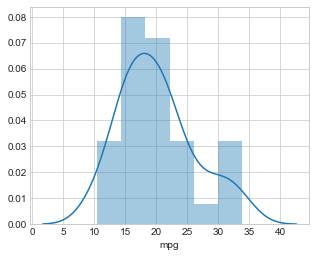

In [148]:
sb.distplot(mpg)

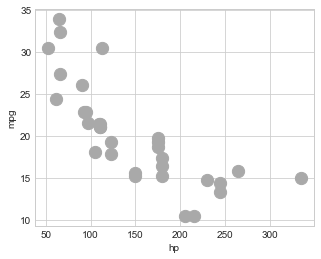

In [151]:
# Seeing scatterplots in action
cars.plot(kind = 'scatter', x = 'hp', y = 'mpg', c = ['darkgray'], s = 150)

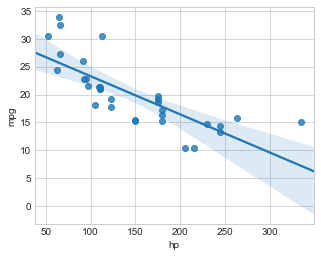

In [152]:
sb.regplot(x = 'hp', y = 'mpg', data = cars, scatter = True)

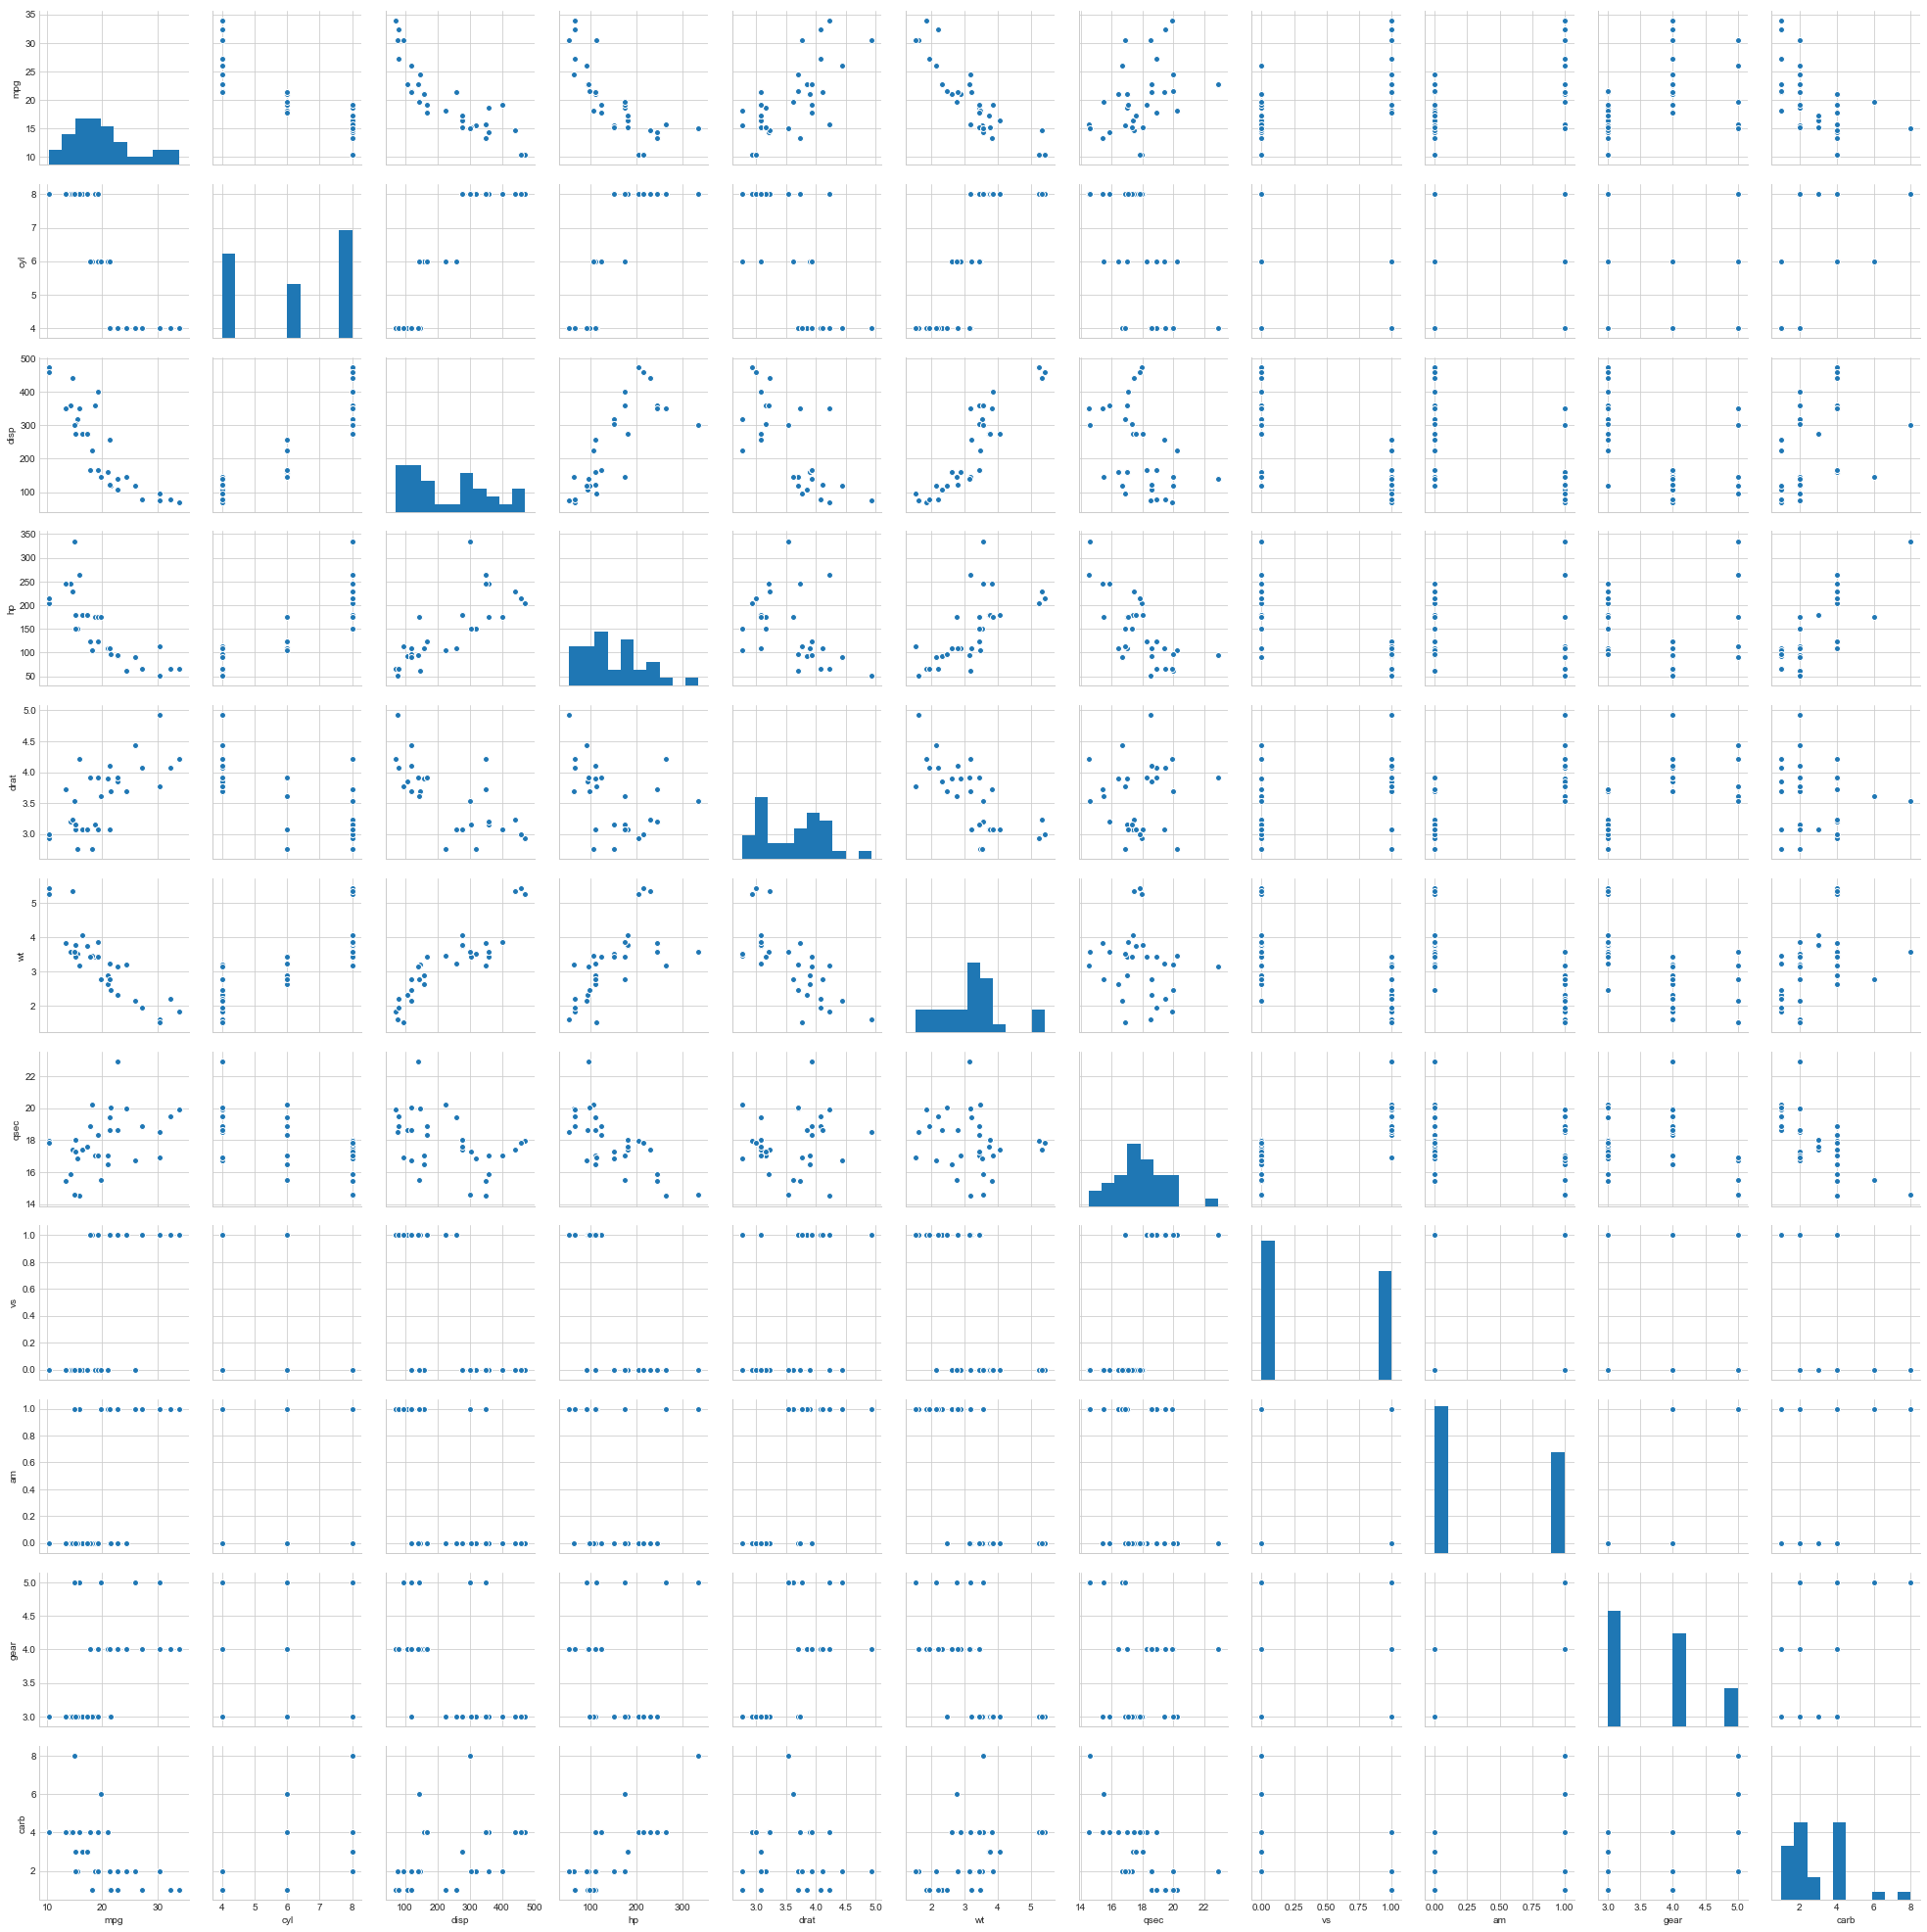

In [153]:
# Generating a scatter plot matrix
sb.pairplot(cars)

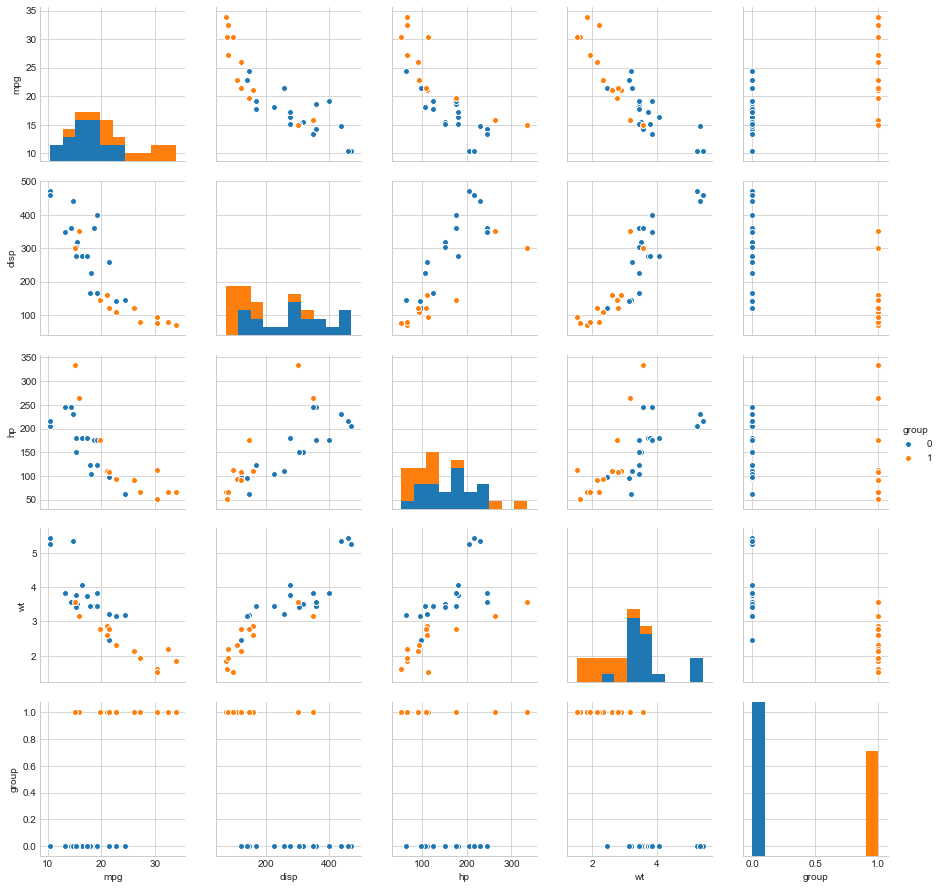

In [156]:
cars_df = pd.DataFrame((cars.ix[:,(1,3,4,6)].values), columns = ['mpg','disp','hp','wt'])
cars_target = cars.ix[:,9].values
target_names = [0,1]

cars_df['group'] = pd.Series(cars_target, dtype = 'category')
sb.pairplot(cars_df, hue = 'group')

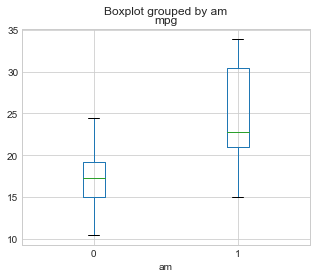

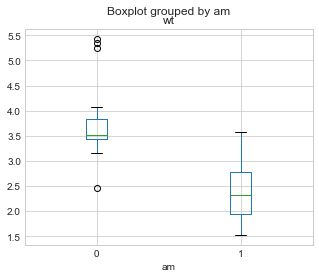

In [158]:
# Building boxplots
cars.boxplot(column = 'mpg', by = 'am')
cars.boxplot(column = 'wt', by = 'am')

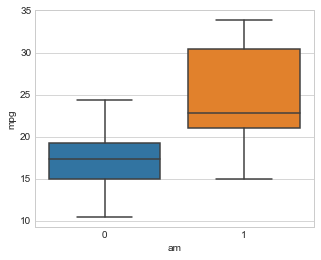

In [160]:
sb.boxplot(x='am', y = 'mpg', data = cars)

In [2]:
# Basic Math and statistics
import numpy as np
from numpy.random import randn

In [3]:
np.set_printoptions(precision=2)

In [4]:
# Creating arrays
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [5]:
b = np.array([[10,20,30], [40,50,60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

In [6]:
# Creating arrays via assignment
np.random.seed(25)
c = 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [7]:
d = np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [8]:
# Performing arithmatic on arrays
a*10

array([10, 20, 30, 40, 50, 60])

In [9]:
c+a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [10]:
c-a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [11]:
c*a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [12]:
c/a
# I wonder what the percent does...

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

In [13]:
c%a
# not sure...

array([0.22, 0.97, 2.77, 2.72, 0.55, 4.  ])

In [14]:
# Multiplying matrices and basic linear algebra
aa = np.array([[2.,4.,6.],[1.,3.,5.],[10.,20.,30.]])
aa

array([[ 2.,  4.,  6.],
       [ 1.,  3.,  5.],
       [10., 20., 30.]])

In [15]:
bb = np.array([[0.,1.,2.],[3.,4.,5.],[6.,7.,8.]])
bb

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [16]:
aa*bb

array([[  0.,   4.,  12.],
       [  3.,  12.,  25.],
       [ 60., 140., 240.]])

In [17]:
np.dot(aa,bb)

array([[ 48.,  60.,  72.],
       [ 39.,  48.,  57.],
       [240., 300., 360.]])

In [3]:
# Generating summary statistics using pandas and scipy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy import stats

In [4]:
url = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch03/03_02/mtcars.csv'
cars = pd.read_csv(url)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# Looking at summary statistics that describe a variable's numeric values
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [6]:
cars.sum(axis=1)

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [7]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [8]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [9]:
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp                472
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [10]:
mpg = cars.mpg
mpg.idxmax()
# This shows the observation which is the max mpg

19

In [11]:
# Looking at summary statistics that describe variable distribution
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [12]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [15]:
gear = cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [16]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [17]:
import numpy as np
import pandas as pd

In [18]:
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.index = cars.car_names
cars.head(15)

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [19]:
# object_name .value_counts()
# The .value_counts() method makes a count of all unique values in an array or Series object.
carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [28]:
# object_name.groupby('column_index')
# To group a Dataframe by its values in a particular column, call the .grouby() method off of the Database
# in the index value of the column Series you want the DataFrame to be grouped by.
cars_cat = cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [37]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

am                                               carb           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  2.666667 ...    
4     12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0  12.0  2.333333 ...    
5      5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   5.0  4.400000 ...    

      cyl         vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 32 columns]

In [38]:
# Transforming variables to categorical data type
# pd.Series(x_variable, dtype)
# To create a Series of catagorical data type, call the pd.Series() function on the array or Series that we
# want the new Series object to contain. When you pass in the dtype='category' argument, this tells Python
# Series a data type of 'category'. Here we create a new categorical Series from the gear variable, and a
# nnenw column in the cars DataFrame, called 'group'.
cars['group'] = pd.Series(cars.gear, dtype = "category")

In [39]:
cars['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [40]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

In [42]:
# Describing categroical data with crosstabs
# pd.crosstab(y_variable, x_variable)
# To create a cross-tab, just call the pd.crosstab() function on the variables you want included in
# the output table.
pd.crosstab(cars['am'], cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


In [43]:
# Chapter 3 exploring correlation between variables
# Segment 4 - Starting with parametric methods in pandas and scipy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [44]:
%matplotlib inline
rcParams['figure.figsize']=8,4
plt.style.use('seaborn-whitegrid')

In [45]:
# Pearson Correlation
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch03/03_04/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

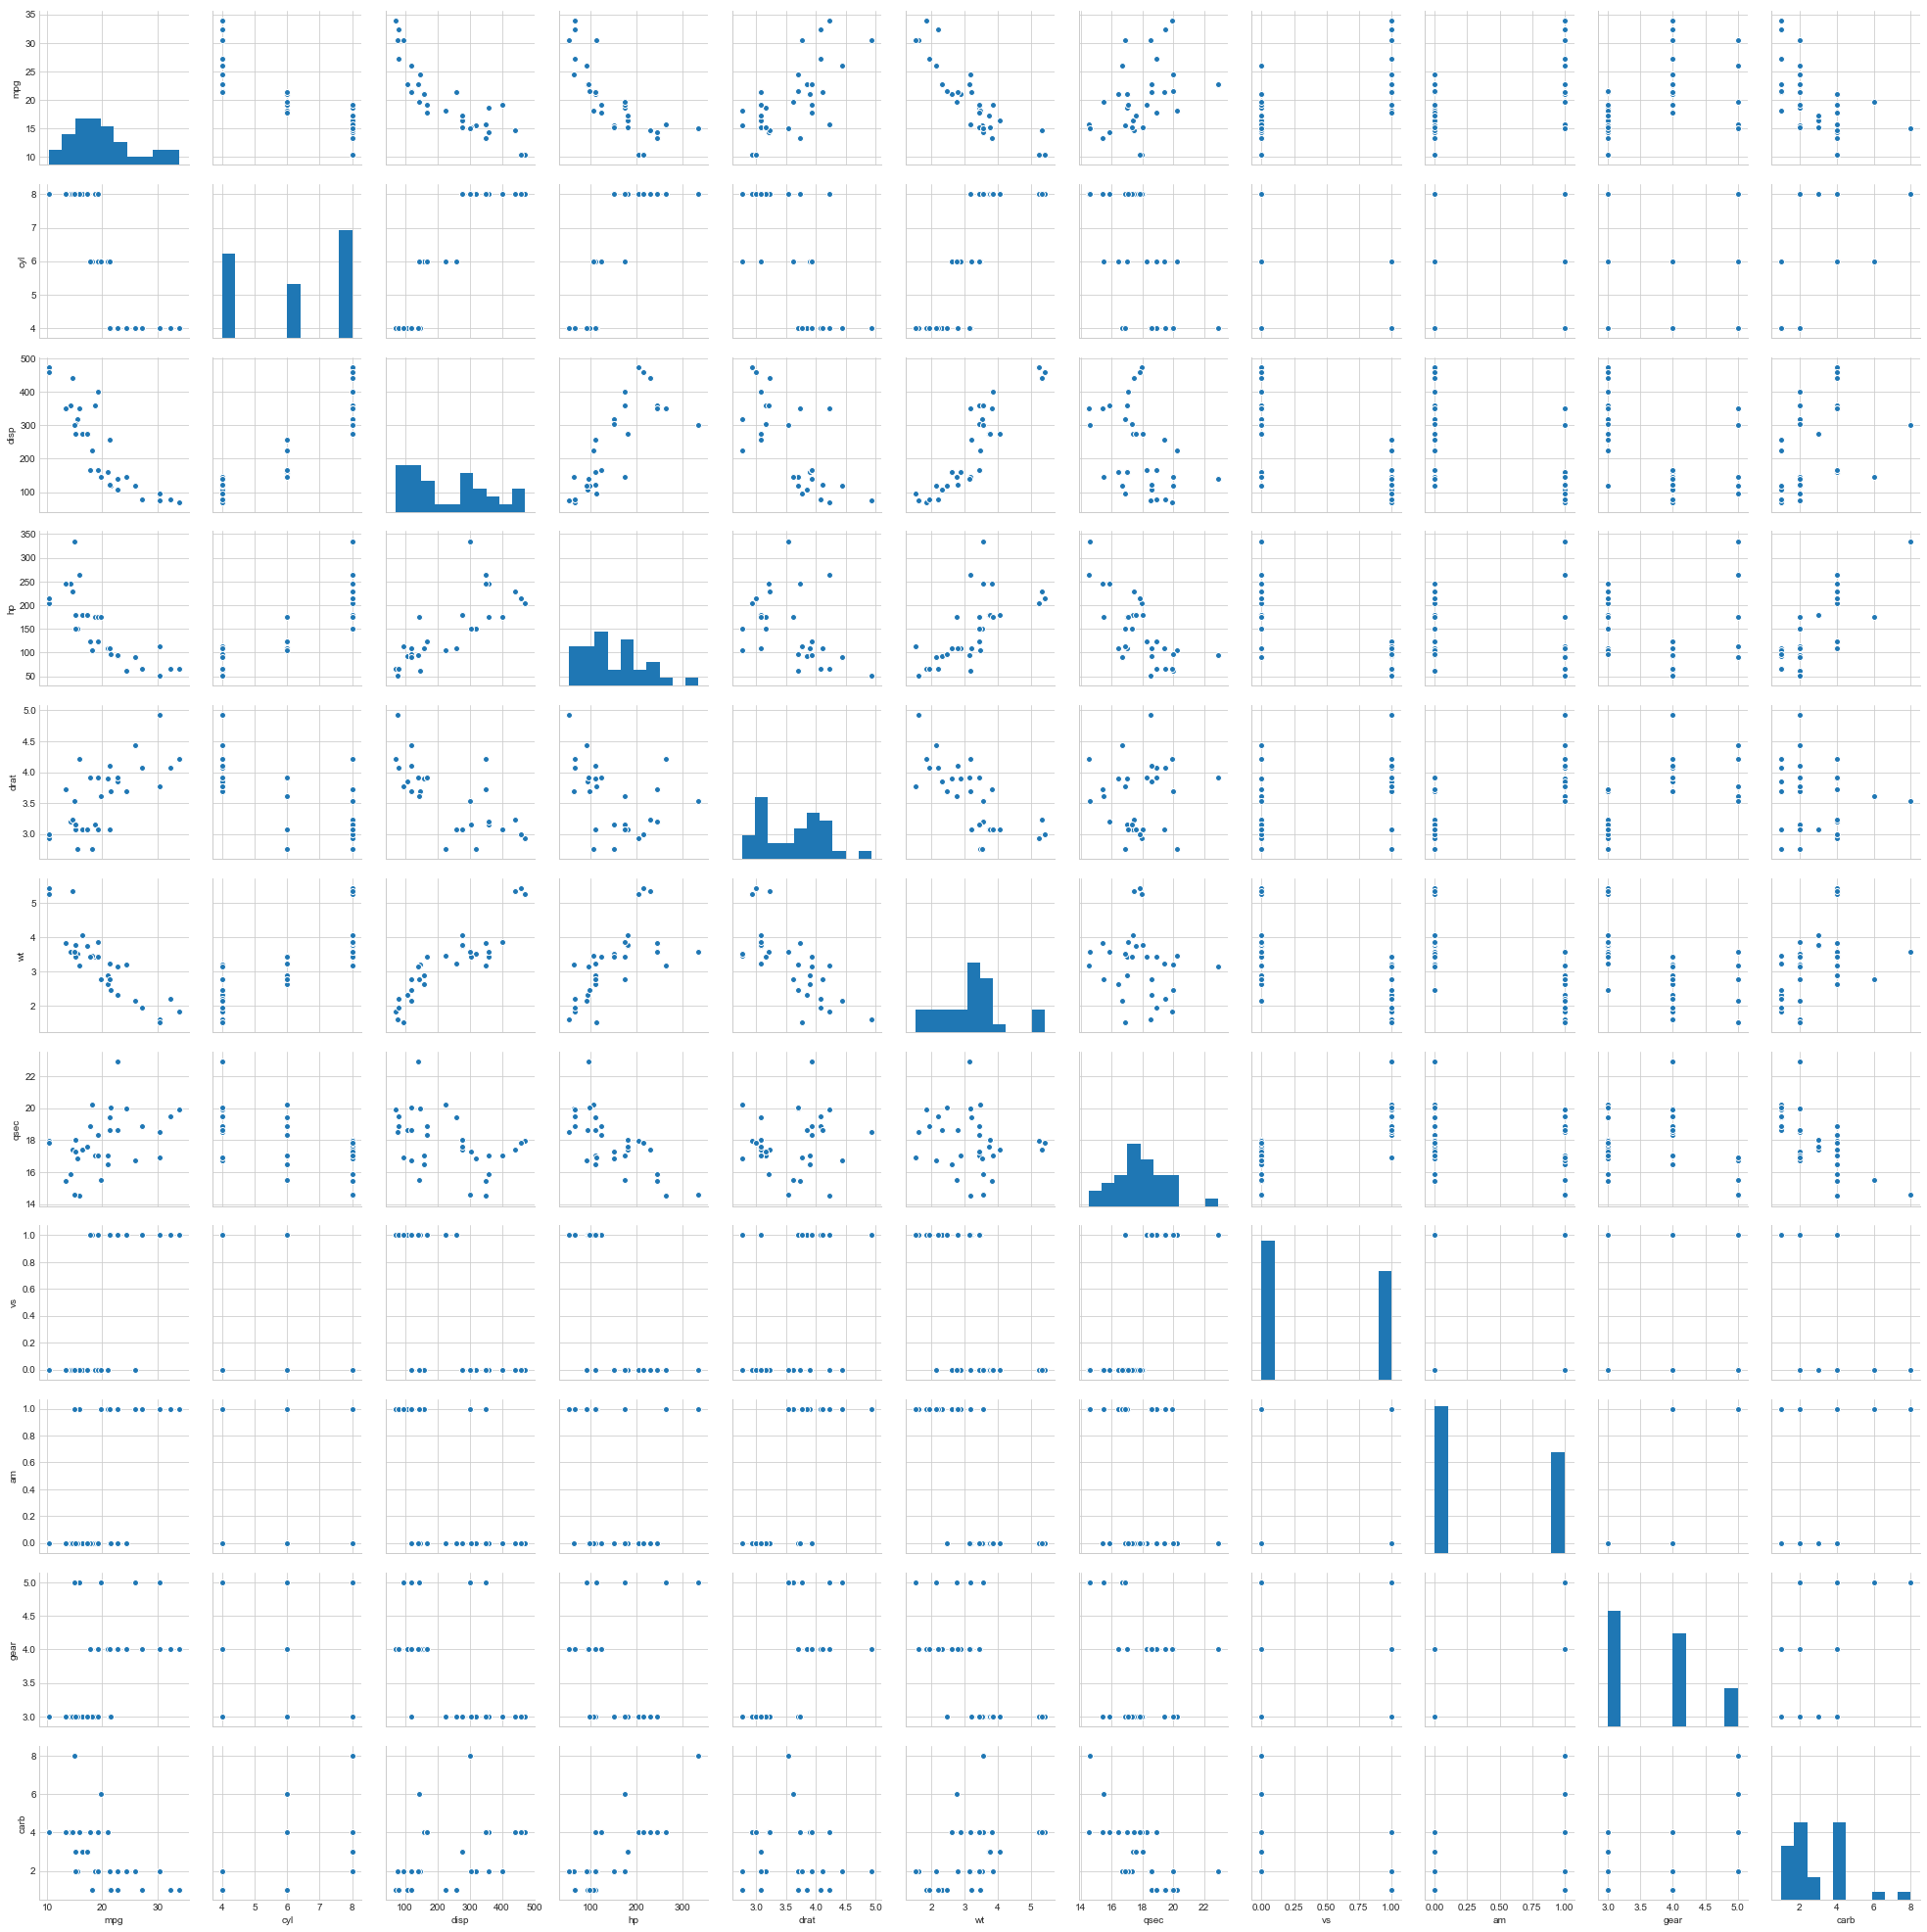

In [46]:
sb.pairplot(cars)

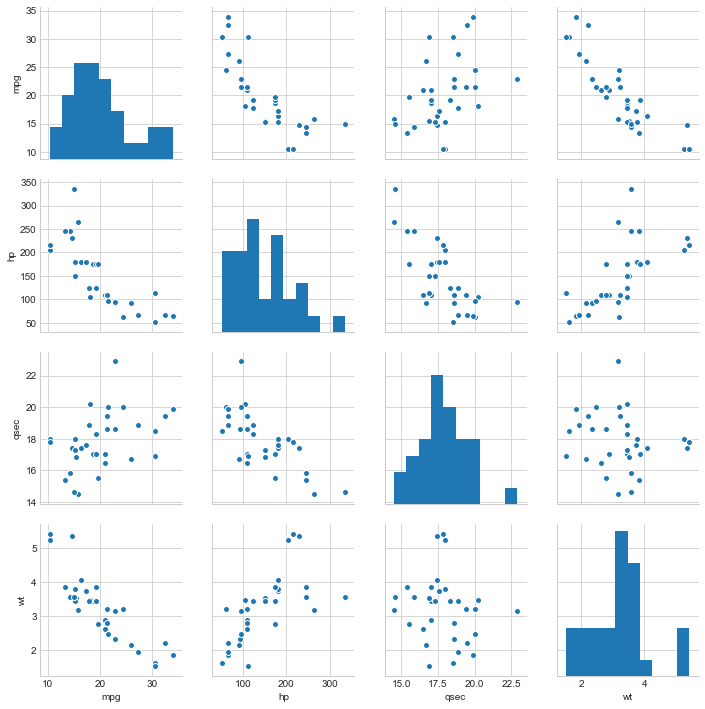

In [47]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

In [56]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient -0.776


In [55]:
pearsonr_coefficient, p_value = pearsonr(mpg,qsec)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient 0.419


In [51]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient -0.868


In [52]:
# Using pandas to calculate the Pearson coreelation coefficient
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


In [54]:
# Using Seaborn to visualize the Pearson correlation coefficient
sb.heatmap(corr.xticklabels=corr.columns.values, yticklabels = corr.columns.values)

SyntaxError: keyword can't be an expression (<ipython-input-54-73c715b2e6fd>, line 2)

In [1]:
# Chapter 3 Exploring correlation between variables
# Segment 5 - Delving into non-parametric methods using pandas and scipy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
plt.style.use('seaborn-whitegrid')

In [4]:
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch03/03_05/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


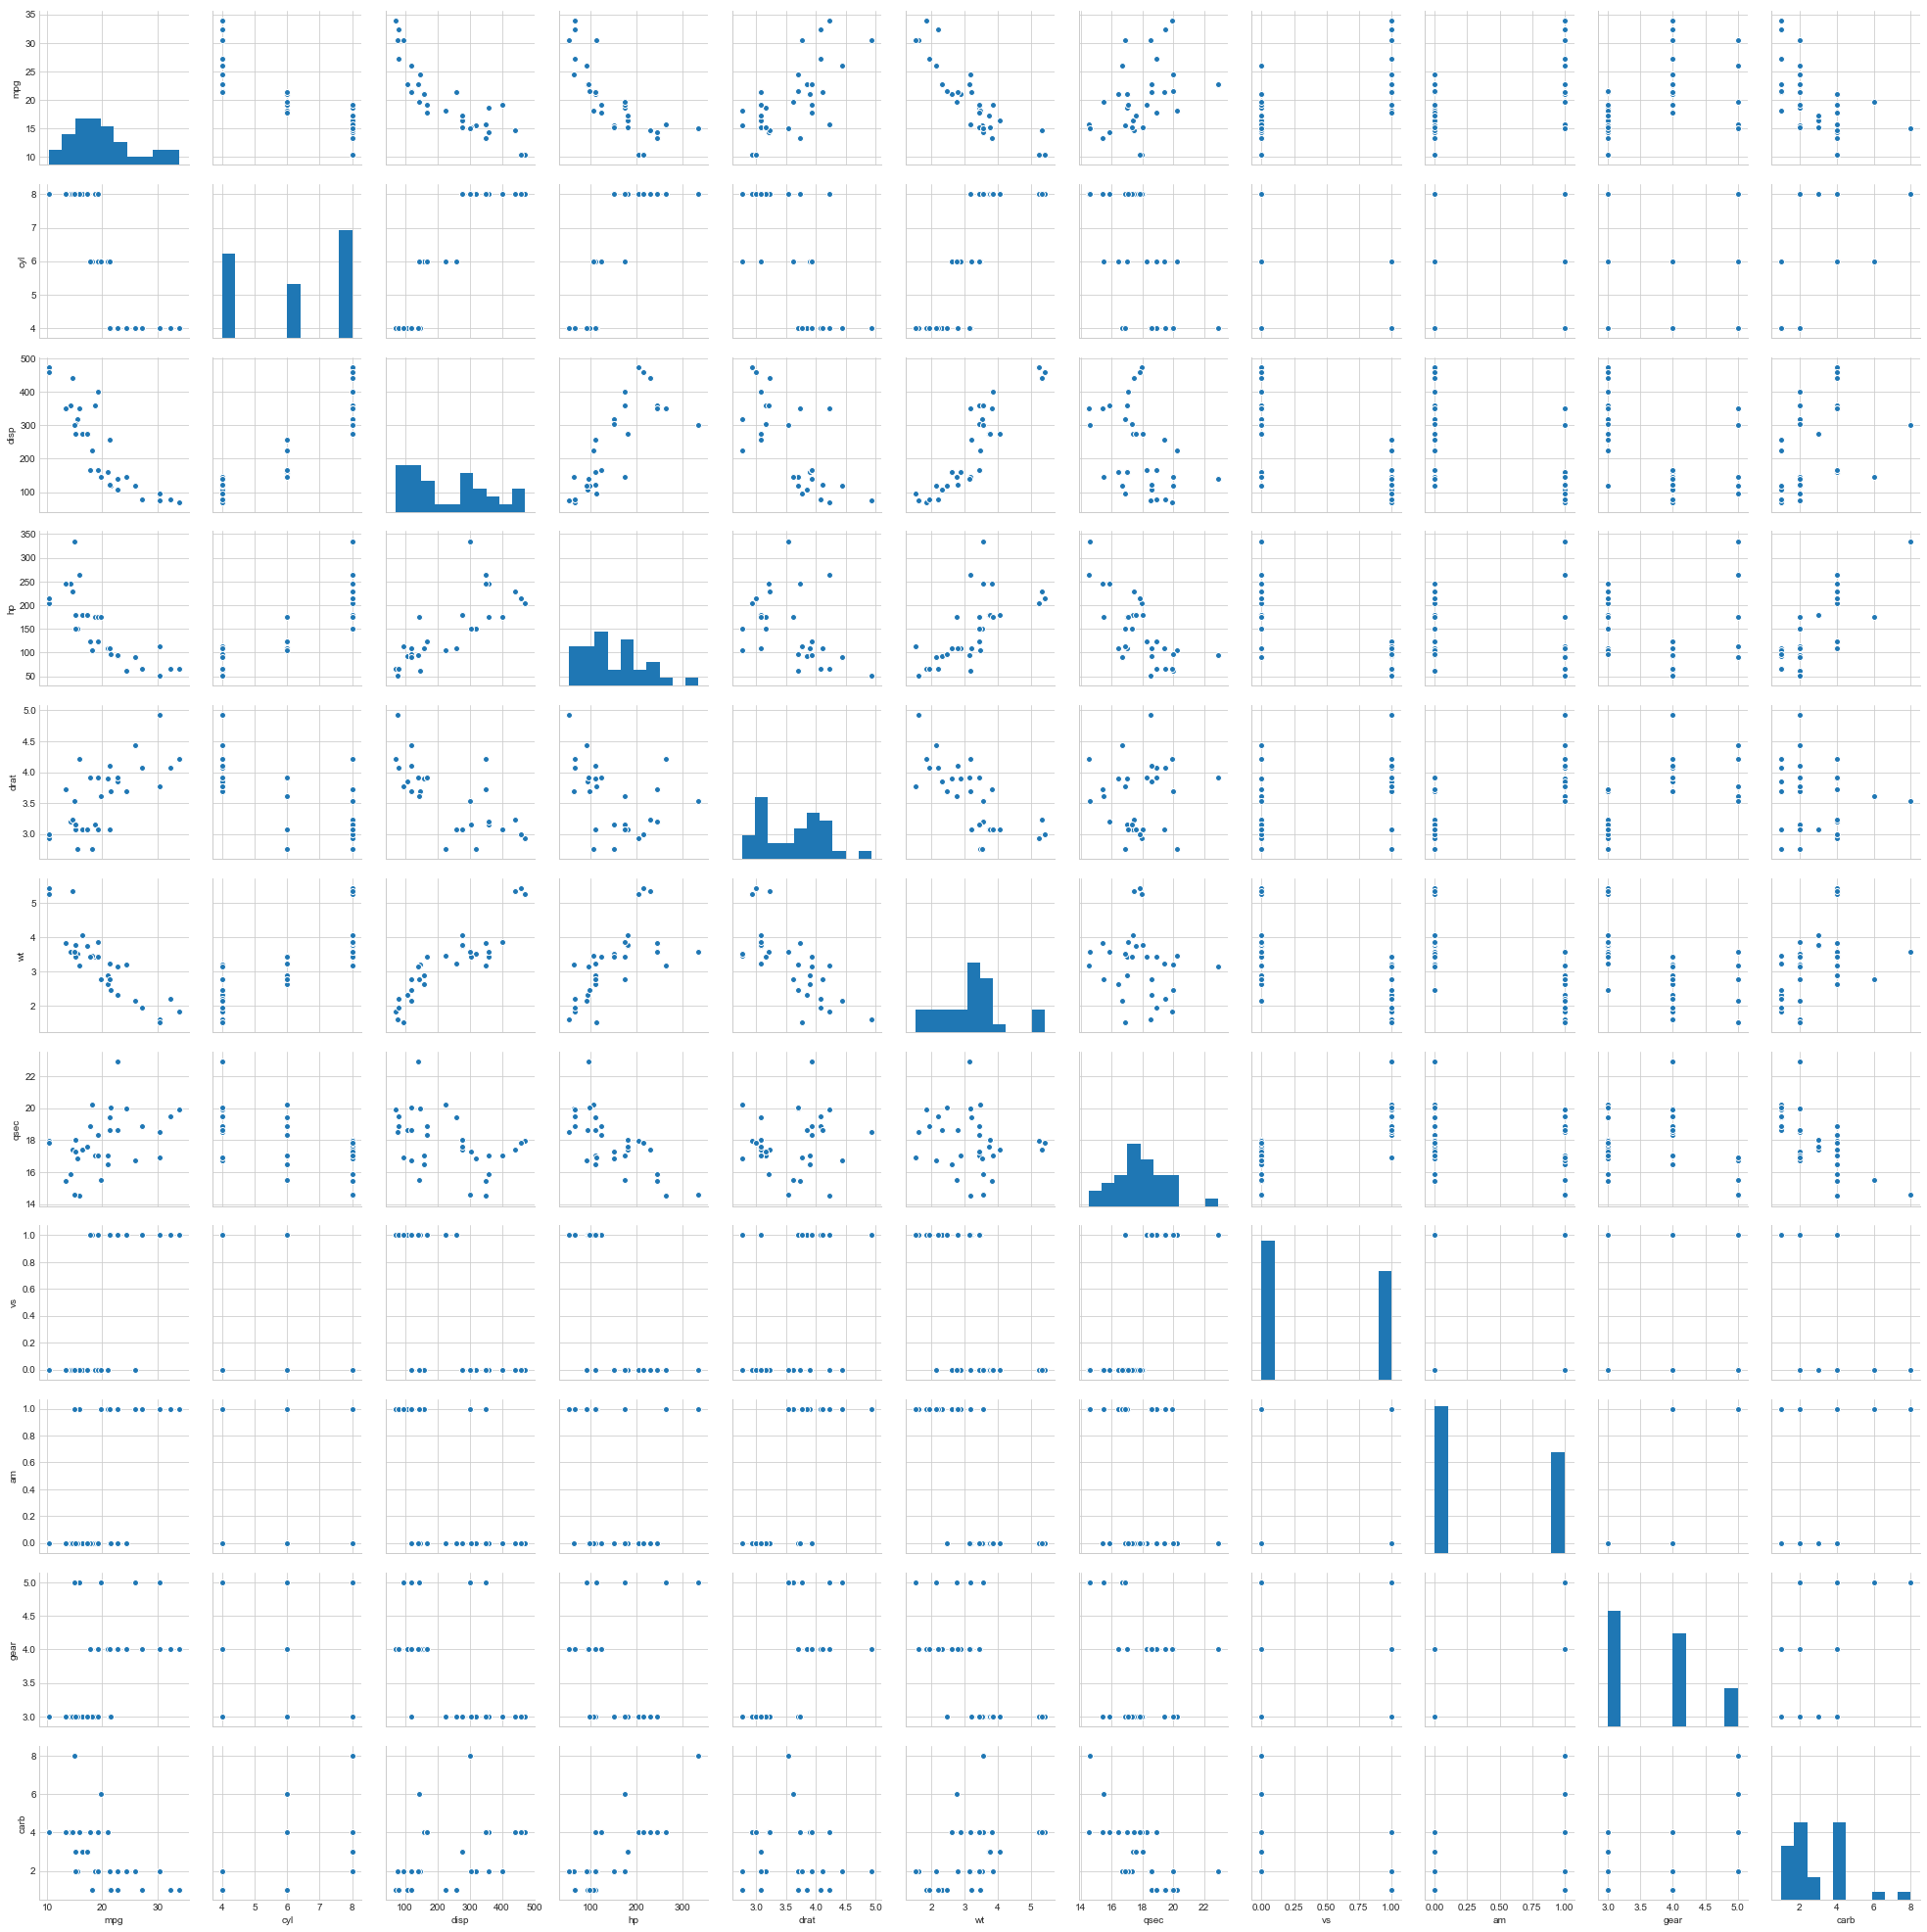

In [5]:
sb.pairplot(cars)

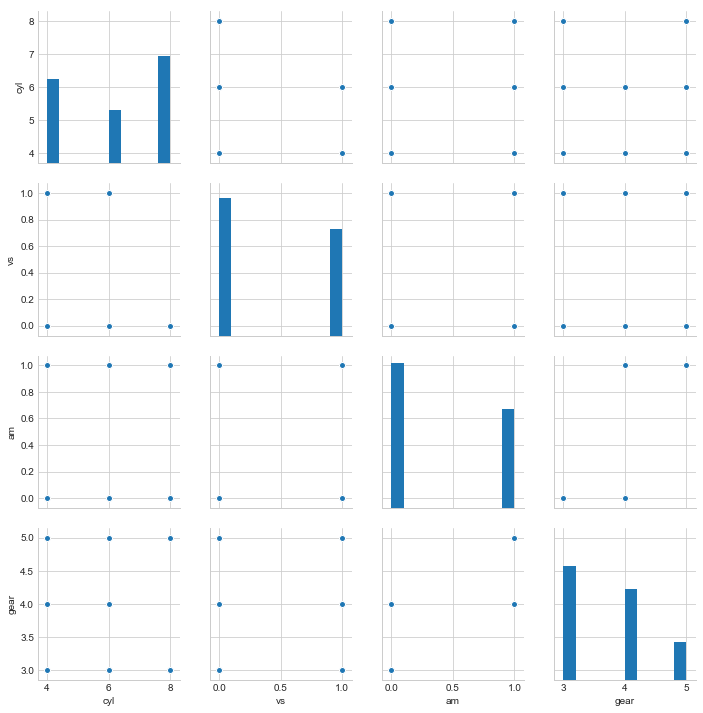

In [6]:
X = cars[['cyl','vs','am','gear']]
sb.pairplot(X)

In [7]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']
spearmanr_coefficient, p_value = spearmanr(cyl,vs)
print 'Spearman Rank Correlation Coefficiennt %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficiennt -0.814


In [8]:
spearmanr_coefficient, p_value = spearmanr(cyl,am)
print 'Spearman Rank Correlation Coefficiennt %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficiennt -0.522


In [9]:
spearmanr_coefficient, p_value = spearmanr(cyl,gear)
print 'Spearman Rank Correlation Coefficiennt %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficiennt -0.564


In [10]:
# Chi-square test for independence
table = pd.crosstab(cyl,am)

from scipy.stats import chi2_contingency
chi2, p,dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistic %0.3f p_value %0.3f' % (chi2,p)

Chi-square Statistic 8.741 p_value 0.013


In [11]:
table = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistic %0.3f p_value %0.3f' % (chi2,p)

Chi-square Statistic 21.340 p_value 0.000


In [12]:
table = pd.crosstab(cyl, gear)
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistic %0.3f p_value %0.3f' % (chi2,p)

Chi-square Statistic 18.036 p_value 0.001


In [13]:
# Chapter 3 - Basic Math and Statistics
# Segment 6 - Transforming dataset distributions
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import matplotlib as rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [14]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

TypeError: 'module' object does not support item assignment

In [15]:
# Normalizing and transforming features with MinMaxScalar() and fit_transform()
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch03/03_06/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

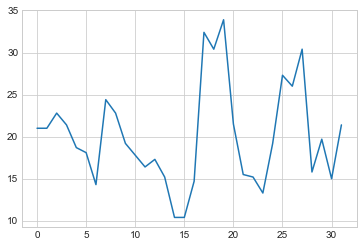

In [16]:
mpg=cars.mpg
plt.plot(mpg)

In [19]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


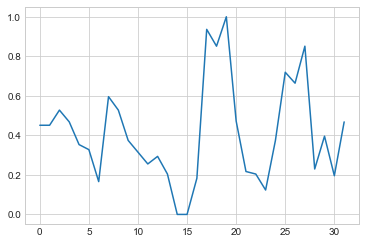

In [22]:
mpg_matrix = mpg.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


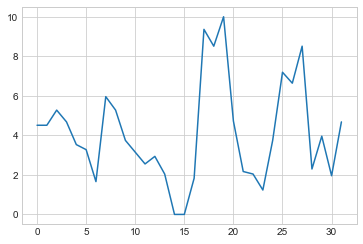

In [24]:
mpg_matrix = mpg.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range = (0,10))
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

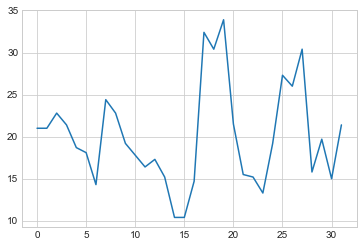

In [25]:
# Using scale() to scale your features
standardized_mpg = scale(mpg, axis = 0, with_mean = False, with_std = False)
plt.plot(standardized_mpg)

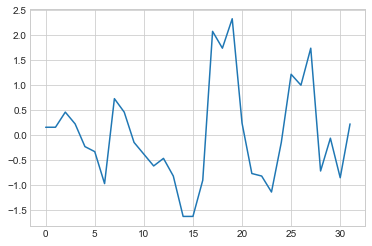

In [28]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

In [1]:
# Chapter 4 - Dimensionality Reduction
# Segment 2 - Explanatory factor analysis
import numpy as np
import pandas as pd

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

In [8]:
# Factor analysis on iris dataset
iris = datasets.load_iris()
X = iris.data
variable_names =iris.feature_names
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [12]:
factor = FactorAnalysis().fit(X)

pd.DataFrame(factor.components_, columns = variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


In [6]:
# Chapter 4 - Dimensionality Reduction
# Segment 3 - Principal component analysis (PCA)
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [13]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [15]:
# PCA onn the iris dataset
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [16]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [17]:
pca.explained_variance_ratio_.sum()

1.0

In [20]:
# When you are deciding how many components to keep, look at the percent of cumulative variance. Make sure to retain
# at least 70% of the dataset's original information.
comps = pd.DataFrame(pca.components_, columns = variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


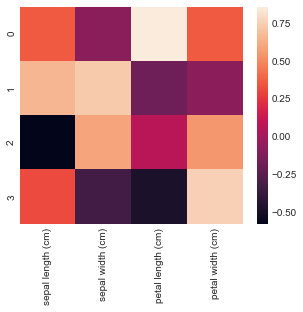

In [21]:
sb.heatmap(comps)

In [22]:
# Chapter 5 - Outlier Analysis
# Segment 1 - Extreme value analysis for outlier detection
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [23]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [25]:
df = pd.read_csv(
    filepath_or_buffer = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch05/05_01/iris.data.csv',
    header = None,
    sep = ',')
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
x = df.ix[:,0:4].values
y = df.ix[:,4].values
df[:5]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[]

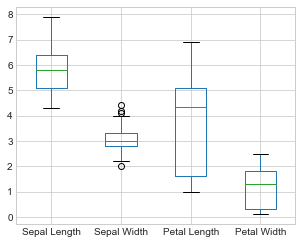

In [26]:
# Identifying outliers from Tukey boxplots
df.boxplot(return_type = 'dict')
plt.plot()

In [27]:
Sepal_Width = x[:,1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [29]:
# Applying Tukey outlier labeling
pd.options.display.float_format = '{:.1f}'.format
x_df = pd.DataFrame(x)
print x_df.describe()

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


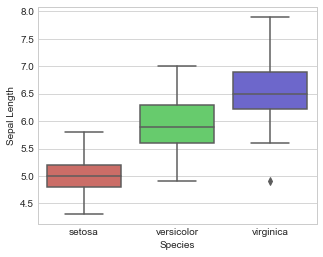

In [6]:
# Visually inspecting boxplots
df = pd.read_csv(
filepath_or_buffer = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch05/05_02/iris.data.csv',
header = None,
sep = ',')

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
data = df.ix[:,0:4].values
target = df.ix[:,:4].values
df[:5]

sb.boxplot(x='Species', y = 'Sepal Length', data = df, palette = 'hls')

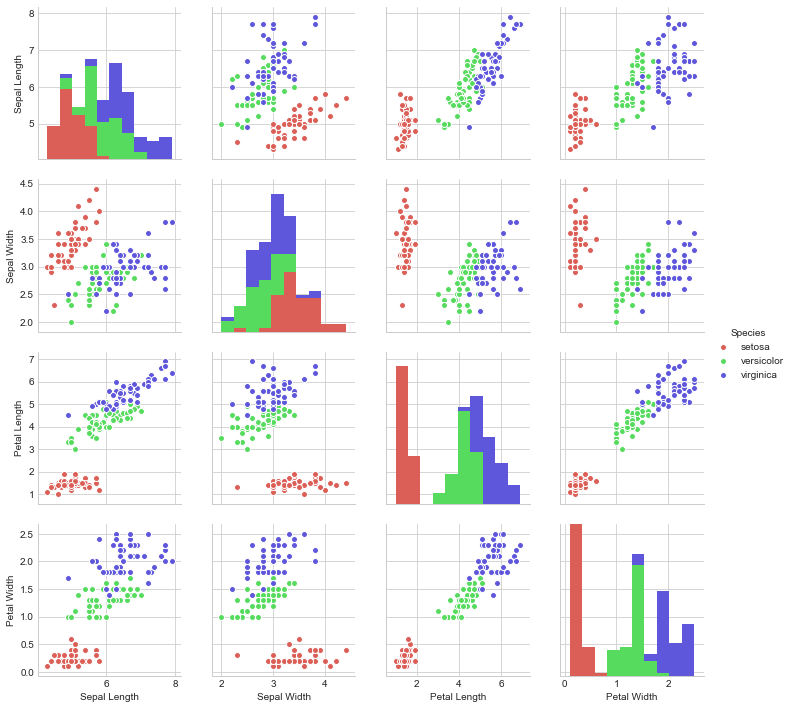

In [8]:
# Looking at the scatterplot matrix
sb.pairplot(df, hue = 'Species', palette = 'hls')

In [1]:
# Segment 3 - DBSCan clustering to identify outliers
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_styler('whitegrid')

AttributeError: module 'seaborn' has no attribute 'set_styler'

In [3]:
# DBSCan clustering to identify outliers
# Train your model and identify outliers
df = pd.read_csv(
filepath_or_buffer = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch05/05_03/iris.data.csv',
header = None,
sep = ',')
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']
data = df.ix[:,0:4].values
target = df.ix[:,4].values
df[:5]

/Users/sallgaier96/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/sallgaier96/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/Users/sallgaier96/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [11]:
# Visualize your results
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBScan for Outliers')

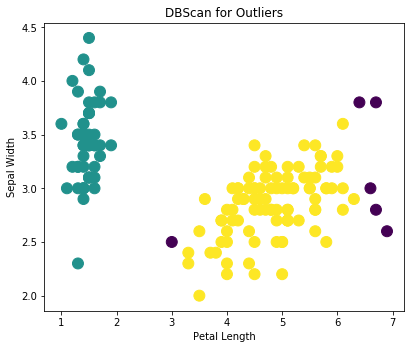

In [12]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(data[:,2],data[:,1],c=colors, s = 120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBScan for Outlier Detection')

In [13]:
# Chapter 6 - Cluster Analysis
# Segment 1 - K-means method
# Setting up for clustering analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [17]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [18]:
# Building and running your model
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [21]:
# Plotting your model outputs
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

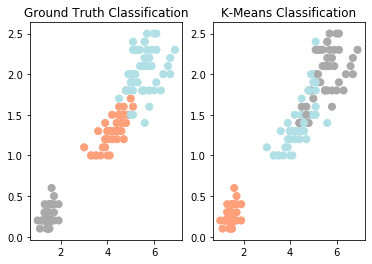

In [23]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c=color_theme[clustering.labels_], s = 50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

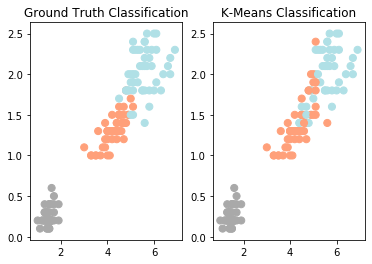

In [24]:
# Labels are wrong
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c=color_theme[relabel], s = 50)
plt.title('K-Means Classification')

In [26]:
# Evaluate your clustering results
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [1]:
# Chapter 6 - Cluster analysis
# Segment 2 - Hierarchial methods
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [4]:
address = '/Users/sallgaier96/Desktop/Python Programming Course/Exercise Files/Ch06/06_02/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
X = cars.ix[:,(1,3,4,6)].values
y = cars.ix[:,(9)].values

/Users/sallgaier96/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/sallgaier96/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


In [5]:
# Using scipy to generate dendrograms
Z = linkage(X, 'ward')

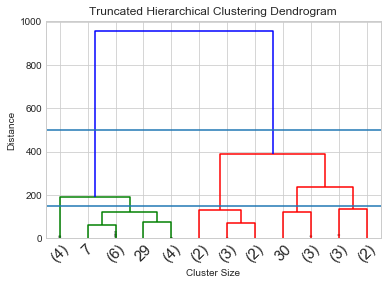

In [6]:
dendrogram(Z,truncate_mode='lastp',p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [8]:
# Generating hierarchical clusters
k=2

Hclustering=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [9]:
Hclustering=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

0.4375

In [10]:
Hclustering=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [11]:
Hclustering=AgglomerativeClustering(n_clusters=k, affinity='manhattan',linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

0.71875

In [ ]:
# In the last four segments, the model with the best score is 1 and 3